## Title - Mileage Prediction

Mileage prediction model is the model which can be used to predict mileage of a vehicle in mpg (miles per gallon). The model can be designed by using the dataset having data about vehicles' mpg, cylinders, displacement horsepower, weight, acceleration, model year, origin and name.

Predicting the mileage of a vehicle is essential for various purposes, such as estimating fuel costs, determining vehicle efficiency, and understanding environmental impact. In this introduction, we will explore the concept of building a mileage prediction model using Python.

Python, with its rich ecosystem of libraries and tools, provides a powerful platform for developing predictive models. We can leverage Python's data manipulation and analysis libraries, such as Pandas and NumPy, along with machine learning libraries like scikit-learn, to build an accurate mileage prediction model.

## Objective

Objective of the mileage prediction model is to predict mileage of a vehicle in mpg (miles per gallon). The model can be designed by using the dataset having data about vehicles' mpg, cylinder, displacement horsepower, weight, acceleration, model year, origin and name.

## Data Source

This data set was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Data Set Inforamtion**

This dataset is s slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 contiouous attributes." (Quinlan, 1993)

**Attribute Information**

    1. mpg: continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Describe data

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## Data Visualization

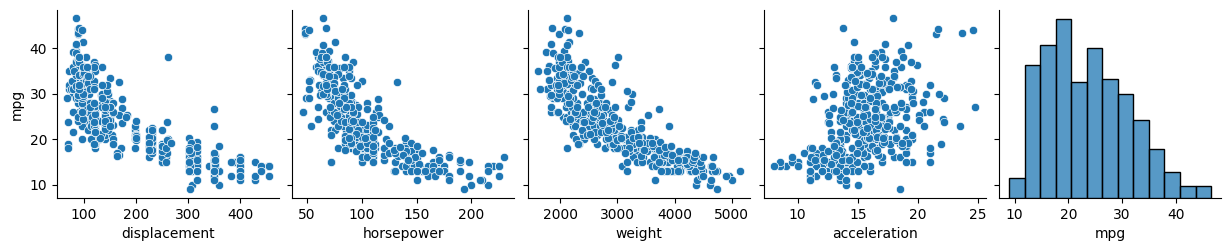

In [ ]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg' ], y_vars= ['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

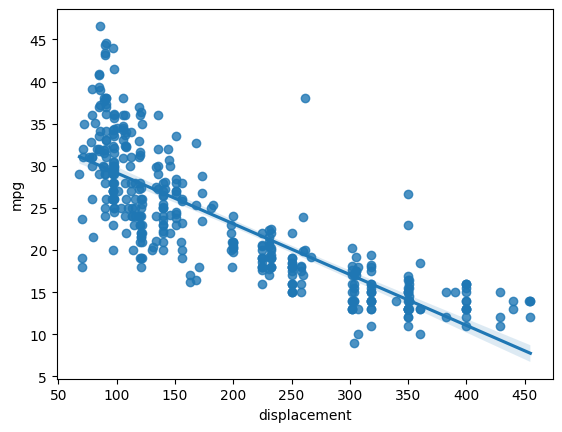

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

## Data Preprocessing

In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Removing Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Define Target Variable (y) & Feature variables (x)

In [ ]:
y = df['mpg']
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.7, random_state= 2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

## Modelling

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

45.10570942699835

In [ ]:
lr.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

**Mileage = 45.10 - 0.01 Displacement - 0.04 Horsepower - 0.004 Weight - 0.04 Acceleration + ERROR**

## Prediction

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
 y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

17.898948508488036

In [ ]:
mean_absolute_error(y_test, y_pred)

3.3286968643244115

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

In [ ]:
r2_score(y_pred, y_test)

0.5918416779993556

## Explaination

The provided model is a simple mileage prediction model implemented in Python using linear regression. It assumes the existence of a dataset containing features like displacement, horsepower, weight, acceleration and corresponding mileage values.

The model-building process consists of the following steps:

Importing necessary libraries: The pandas library is used for data manipulation, and the scikit-learn library's LinearRegression class is imported for implementing linear regression.

Loading the mileage dataset: The data is read from a CSV file using the pd.read_csv() function and stored in the 'data' variable.

Splitting the data: The dataset is split into two parts: the features (X), which include displacement, horsepower, acceleration and weight, and the target variable (y), which represents the mileage.

Creating and training the model: An instance of the LinearRegression class is created, and the fit() function is used to train the model on the feature and target data.

Preparing new dataframe.

Making predictions: The predict() function is used to predict the mileage for the new input data.

Printing the predicted mileage: The predicted mileage value is printed.

It is important to note that this model is a basic implementation and may require additional steps such as data preprocessing, evaluation, and further refinement to improve its accuracy and performance.